# New Section

# Load the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.svm import SVC                     #SVC
from sklearn.naive_bayes import GaussianNB      #naivebayes
from xgboost import XGBClassifier               #XGBoostClassifier
from imblearn.over_sampling import SMOTE        #SMOTE

 ## Load the data

In [ ]:
train=pd.read_csv("/content/train_LZdllcl (2).csv")
test=pd.read_csv("/content/test_2umaH9m (2).csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [ ]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


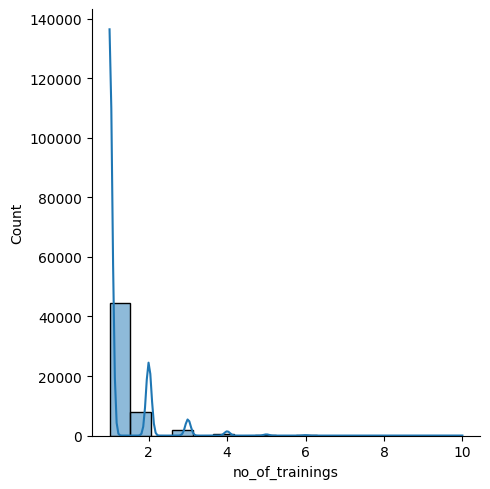

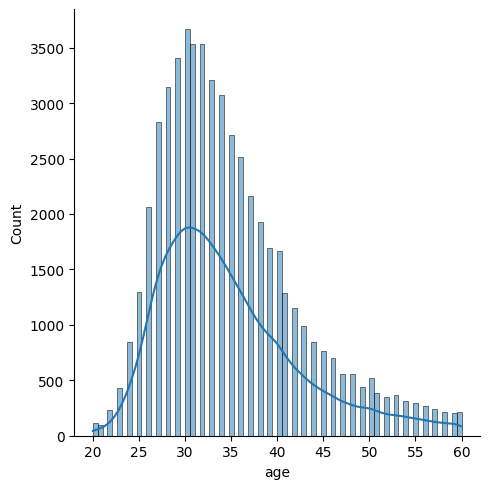

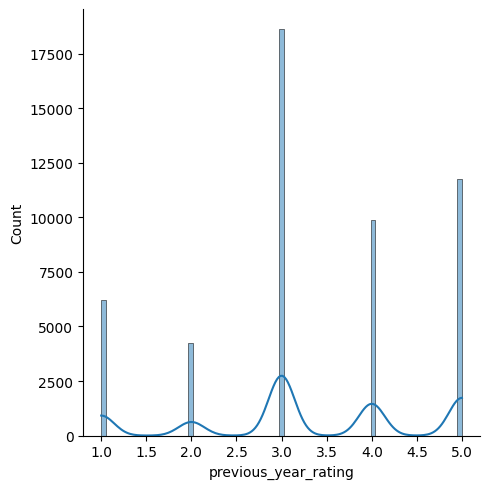

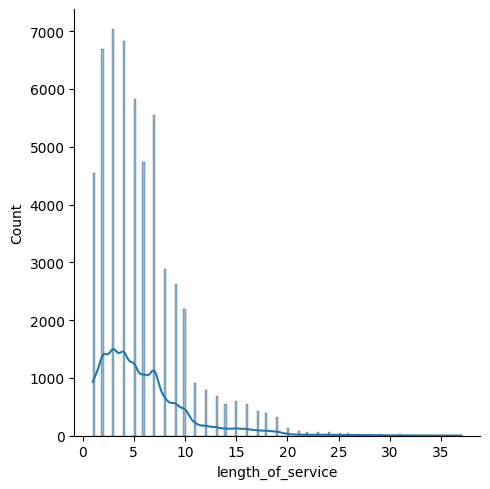

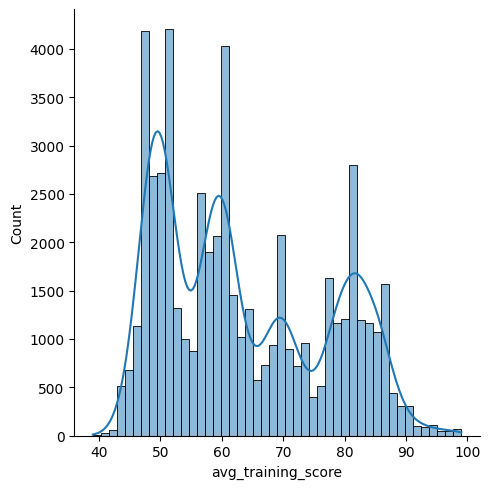

In [ ]:
for i in train.columns:
  if i in['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']:
     sns.displot(x=train[i],kde=True)
  else:
    continue

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
columns_to_plot = ['department' , 'region' , 'education', 'gender', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?', 'is_promoted']



In [ ]:
train['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

<Axes: xlabel='is_promoted'>

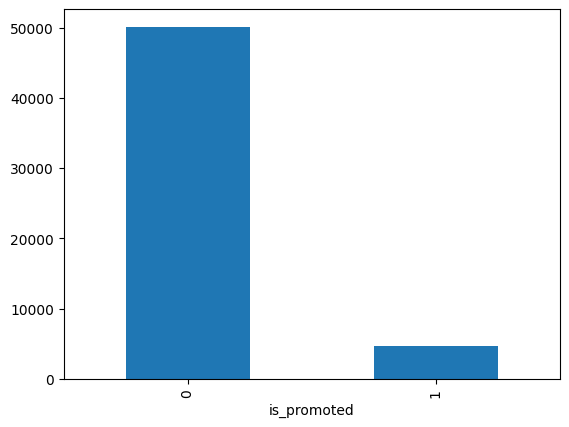

In [ ]:
train['is_promoted'].value_counts().plot(kind='bar')    #The data is imbalanced


<Axes: xlabel='department'>

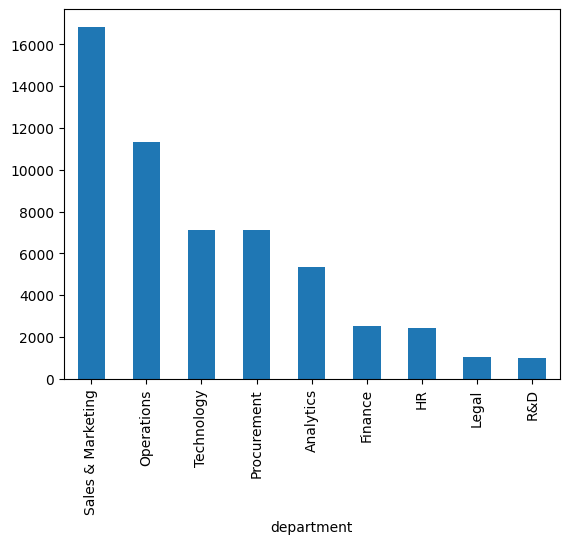

In [ ]:
train['department'].value_counts().plot(kind='bar')    #The data is impalanced


<Axes: xlabel='region'>

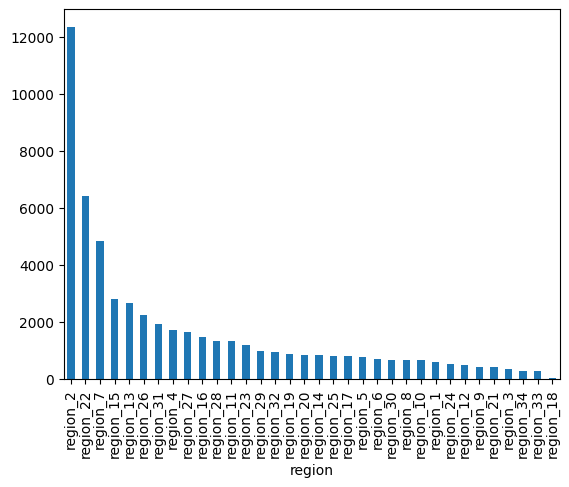

In [ ]:
train['region'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

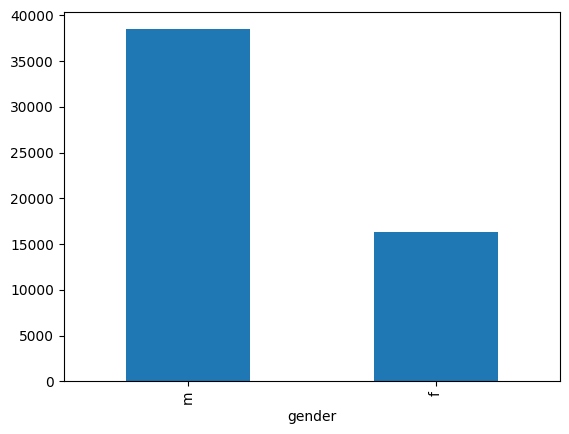

In [ ]:
train['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='recruitment_channel'>

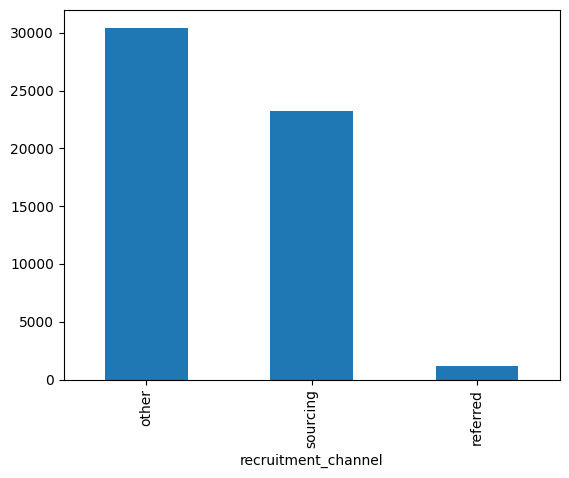

In [ ]:
train['recruitment_channel'].value_counts().plot(kind='bar')

Bi-variate Analysis

Correlation

In [ ]:
sns.heatmap(train.corr(),annot=True)

ValueError: could not convert string to float: 'Sales & Marketing'

Chi square test

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Null Hypothesis:The two variables are independent of each other




Alternate Hypothesis: The two variables are dependent of each other

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def chi2_sq_test(var1,var2):
  table=pd.crosstab(var1,var2)
  _,p,_,_=chi2_contingency(table)
  if p<=0.05:
    print('Accept the Alternate Hypothesis',round(p,2))
  else:
    print('Accept the Null Hypothesis',round(p,2))
  return table

In [ ]:
chi2_sq_test(train['department'],train['is_promoted'])

Accept the Alternate Hypothesis 0.0


is_promoted,0,1
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


In [ ]:
chi2_sq_test(train['region'],train['is_promoted'])

Accept the Alternate Hypothesis 0.0


is_promoted,0,1
region,,
region_1,552,58
region_10,597,51
region_11,1241,74
region_12,467,33
region_13,2418,230
region_14,765,62
region_15,2586,222
region_16,1363,102
region_17,687,109


In [ ]:
chi2_sq_test(train['education'],train['is_promoted'])

Accept the Alternate Hypothesis 0.0


is_promoted,0,1
education,,
Bachelor's,33661,3008
Below Secondary,738,67
Master's & above,13454,1471


In [ ]:
chi2_sq_test(train['gender'],train['is_promoted'])

Accept the Alternate Hypothesis 0.01


is_promoted,0,1
gender,,
f,14845,1467
m,35295,3201


In [ ]:
chi2_sq_test(train['recruitment_channel'],train['is_promoted'])

Accept the Alternate Hypothesis 0.0


is_promoted,0,1
recruitment_channel,,
other,27890,2556
referred,1004,138
sourcing,21246,1974


Data Preparation

In [ ]:
#Missing value dealing
train['education']=np.where(train['education'].isna(),train['education'].mode(dropna=True)[0],train['education'])
train['previous_year_rating']=np.where(train['previous_year_rating'].isna(),train['previous_year_rating'].median(skipna=True),train['previous_year_rating'])


In [ ]:
#Data type conversion
train['previous_year_rating']=train['previous_year_rating'].astype('int')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           54808 non-null  int64 
 1   department            54808 non-null  object
 2   region                54808 non-null  object
 3   education             54808 non-null  object
 4   gender                54808 non-null  object
 5   recruitment_channel   54808 non-null  object
 6   no_of_trainings       54808 non-null  int64 
 7   age                   54808 non-null  int64 
 8   previous_year_rating  54808 non-null  int64 
 9   length_of_service     54808 non-null  int64 
 10  KPIs_met >80%         54808 non-null  int64 
 11  awards_won?           54808 non-null  int64 
 12  avg_training_score    54808 non-null  int64 
 13  is_promoted           54808 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.9+ MB


One hot encoding

In [ ]:
train_enc=pd.get_dummies(train)

In [ ]:
train_enc

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5,8,1,0,49,0,False,...,False,False,False,False,True,True,False,False,False,True
1,65141,1,30,5,4,0,0,60,0,False,...,False,False,True,False,False,False,True,True,False,False
2,7513,1,34,3,7,0,0,50,0,False,...,False,False,True,False,False,False,True,False,False,True
3,2542,2,39,1,10,0,0,50,0,False,...,False,False,True,False,False,False,True,True,False,False
4,48945,1,45,3,2,0,0,73,0,False,...,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3,17,0,0,78,0,False,...,False,False,True,False,False,False,True,False,False,True
54804,74592,1,37,2,6,0,0,56,0,False,...,False,False,False,False,True,True,False,True,False,False
54805,13918,1,27,5,3,1,0,79,0,True,...,False,False,True,False,False,False,True,True,False,False
54806,13614,1,29,1,2,0,0,45,0,False,...,False,True,True,False,False,False,True,False,False,True


In [ ]:
train_enc.drop('employee_id',axis=1,inplace=True)

In [ ]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   no_of_trainings               54808 non-null  int64
 1   age                           54808 non-null  int64
 2   previous_year_rating          54808 non-null  int64
 3   length_of_service             54808 non-null  int64
 4   KPIs_met >80%                 54808 non-null  int64
 5   awards_won?                   54808 non-null  int64
 6   avg_training_score            54808 non-null  int64
 7   is_promoted                   54808 non-null  int64
 8   department_Analytics          54808 non-null  bool 
 9   department_Finance            54808 non-null  bool 
 10  department_HR                 54808 non-null  bool 
 11  department_Legal              54808 non-null  bool 
 12  department_Operations         54808 non-null  bool 
 13  department_Procurement        5

divide data into x and y

In [ ]:
y=train_enc['is_promoted']



In [ ]:
x = train_enc.drop(['is_promoted'],axis=1)

In [ ]:
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [ ]:
print(x.shape)
print(y.shape)

(100280, 58)
(100280,)


Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

Logistic Regression

In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_hat_train=logreg.predict(x_train)
y_hat_test=logreg.predict(x_test)

In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train,y_hat_train)

The accuracy of the model is 0.91
[[36993  2952]
 [ 4659 35620]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     39945
           1       0.92      0.88      0.90     40279

    accuracy                           0.91     80224
   macro avg       0.91      0.91      0.91     80224
weighted avg       0.91      0.91      0.91     80224



In [ ]:
model_eval(y_test,y_hat_test)

The accuracy of the model is 0.91
[[9464  731]
 [1125 8736]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     10195
           1       0.92      0.89      0.90      9861

    accuracy                           0.91     20056
   macro avg       0.91      0.91      0.91     20056
weighted avg       0.91      0.91      0.91     20056



** *italicized text*DecisionTree** Classifier

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_dtree)

The accuracy of the model is 1.0
[[39939     6]
 [   12 40267]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39945
           1       1.00      1.00      1.00     40279

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224



In [ ]:
model_eval(y_test,y_hat_test_dtree)

The accuracy of the model is 0.94
[[9468  727]
 [ 481 9380]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     10195
           1       0.93      0.95      0.94      9861

    accuracy                           0.94     20056
   macro avg       0.94      0.94      0.94     20056
weighted avg       0.94      0.94      0.94     20056



Random Forest Classifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_rf)

The accuracy of the model is 1.0
[[39931    14]
 [    4 40275]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39945
           1       1.00      1.00      1.00     40279

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224



In [ ]:
model_eval(y_test,y_hat_test_rf)

The accuracy of the model is 0.96
[[9976  219]
 [ 502 9359]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10195
           1       0.98      0.95      0.96      9861

    accuracy                           0.96     20056
   macro avg       0.96      0.96      0.96     20056
weighted avg       0.96      0.96      0.96     20056



Ada Boost Classifier

In [ ]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
y_hat_train_ada=ada.predict(x_train)
y_hat_test_ada=ada.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_ada)


The accuracy of the model is 0.88
[[36106  3839]
 [ 5991 34288]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     39945
           1       0.90      0.85      0.87     40279

    accuracy                           0.88     80224
   macro avg       0.88      0.88      0.88     80224
weighted avg       0.88      0.88      0.88     80224



In [ ]:
model_eval(y_test,y_hat_test_ada)


The accuracy of the model is 0.88
[[9201  994]
 [1445 8416]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10195
           1       0.89      0.85      0.87      9861

    accuracy                           0.88     20056
   macro avg       0.88      0.88      0.88     20056
weighted avg       0.88      0.88      0.88     20056



*gradient* Boosting

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_hat_train_gb=gb.predict(x_train)
y_hat_test_gb=gb.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_gb)

The accuracy of the model is 0.91
[[36329  3616]
 [ 3932 36347]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     39945
           1       0.91      0.90      0.91     40279

    accuracy                           0.91     80224
   macro avg       0.91      0.91      0.91     80224
weighted avg       0.91      0.91      0.91     80224



In [ ]:
model_eval(y_test,y_hat_test_gb)

The accuracy of the model is 0.91
[[9252  943]
 [ 958 8903]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10195
           1       0.90      0.90      0.90      9861

    accuracy                           0.91     20056
   macro avg       0.91      0.91      0.91     20056
weighted avg       0.91      0.91      0.91     20056



XG Boost

In [ ]:
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_hat_train_xgb=xg.predict(x_train)
y_hat_test_xgb=xg.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_xgb)

The accuracy of the model is 0.96
[[39386   559]
 [ 2726 37553]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     39945
           1       0.99      0.93      0.96     40279

    accuracy                           0.96     80224
   macro avg       0.96      0.96      0.96     80224
weighted avg       0.96      0.96      0.96     80224



In [ ]:
model_eval(y_test,y_hat_test_xgb)

The accuracy of the model is 0.95
[[9973  222]
 [ 715 9146]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     10195
           1       0.98      0.93      0.95      9861

    accuracy                           0.95     20056
   macro avg       0.95      0.95      0.95     20056
weighted avg       0.95      0.95      0.95     20056



KNN

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_hat_train_knn=knn.predict(x_train)

In [ ]:
y_hat_test_knn=knn.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_knn)

The accuracy of the model is 0.89
[[31449  8496]
 [   54 40225]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     39945
           1       0.83      1.00      0.90     40279

    accuracy                           0.89     80224
   macro avg       0.91      0.89      0.89     80224
weighted avg       0.91      0.89      0.89     80224



In [ ]:
model_eval(y_test,y_hat_test_knn)

The accuracy of the model is 0.85
[[7219 2976]
 [  29 9832]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     10195
           1       0.77      1.00      0.87      9861

    accuracy                           0.85     20056
   macro avg       0.88      0.85      0.85     20056
weighted avg       0.88      0.85      0.85     20056



SVM

In [ ]:
from sklearn.svm import SVC


svm = SVC()

svm.fit(x_train, y_train)

print("SVM model trained successfully.")

SVM model trained successfully.


In [ ]:
y_hat_train_svm=svm.predict(x_train)
y_hat_test_svm=svm.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_svm)

The accuracy of the model is 0.83
[[32410  7535]
 [ 6092 34187]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     39945
           1       0.82      0.85      0.83     40279

    accuracy                           0.83     80224
   macro avg       0.83      0.83      0.83     80224
weighted avg       0.83      0.83      0.83     80224



In [ ]:
model_eval(y_test,y_hat_test_svm)

The accuracy of the model is 0.83
[[8258 1937]
 [1459 8402]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     10195
           1       0.81      0.85      0.83      9861

    accuracy                           0.83     20056
   macro avg       0.83      0.83      0.83     20056
weighted avg       0.83      0.83      0.83     20056



SVM with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    "C": np.arange(2, 10, 2),
    "degree": (3, 4, 5, 6),
    "kernel": ["linear", "poly", "rbf", "sigmoid"]
}


In [ ]:
random_search_cv=RandomizedSearchCV(estimator=svm,param_distributions=params,verbose=True)

In [ ]:
random_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
random_search_cv.best_params_

Gaussian nb

In [ ]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_hat_train_nb=nb.predict(x_train)
y_hat_test_nb=nb.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_nb)

In [ ]:
model_eval(y_test,y_hat_test_nb)

Application of the model on the test data

In [ ]:
test['education'] = np.where(test['education'].isna(), test['education'].mode(dropna=True)[0], test['education'])
test['previous_year_rating'] = np.where(test['previous_year_rating'].isna(), test['previous_year_rating'].median(skipna= True), test['previous_year_rating'])

In [ ]:
test['previous_year_rating'] = test['previous_year_rating'].astype('int')

In [ ]:
test_enc = pd.get_dummies(test)

In [ ]:
test_enc.drop(['employee_id'], axis = 1, inplace = True)

In [ ]:
test['is_promoted'] = rf.predict(test_enc)

In [ ]:
submission_file = pd.read_csv('/content/sample_submission_M0L0uXE (2).csv')

In [ ]:
submission_file.head()

In [ ]:
submission_file['is_promoted'] = test['is_promoted']

In [ ]:
submission_file['is_promoted'].value_counts()

In [ ]:
submission_file.to_csv('submission.csv', index= False)